In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat
import seaborn as sns
from datetime import datetime

ukraine_file = './data/datascraping/ukraine_raw_redditapi_data.csv'
consp_file = './data/datascraping/conspiracy_raw_redditapi_data.csv'
consp_file_filtered = './data/preprocessed/conspiracy_preprocessed_filtered.csv'


In [6]:
ukraine_df = pd.read_csv(ukraine_file)
ukraine_authors = ukraine_df.groupby('author', as_index=False).size()
ukraine_df.describe()

,num_comments,score,time,ups,downs,upvoteratio,category
count,36737.000000,36737.000000,3.673700e+04,36737.000000,36737.0,36737.000000,0.0
mean,16.489044,286.725808,1.645959e+09,286.725808,0.0,0.873719,NaN
std,76.302036,2414.245709,1.586767e+05,2414.245709,0.0,0.210420,NaN
min,0.000000,0.000000,1.645571e+09,0.000000,0.0,0.010000,NaN
25%,0.000000,1.000000,1.645834e+09,1.000000,0.0,0.850000,NaN
50%,3.000000,7.000000,1.645956e+09,7.000000,0.0,0.980000,NaN
75%,12.000000,74.000000,1.646081e+09,74.000000,0.0,1.000000,NaN
max,4102.000000,195709.000000,1.646262e+09,195709.000000,0.0,1.000000,NaN


In [7]:
consp_df = pd.read_csv(consp_file)
consp_authors = consp_df.groupby('author', as_index=False).size()
consp_df.describe()

,num_comments,score,time,ups,downs,upvoteratio,category
count,7806.000000,7806.000000,7.806000e+03,7806.000000,7806.0,7806.000000,0.0
mean,26.708814,70.492826,1.645926e+09,70.492826,0.0,0.716621,NaN
std,87.729443,351.515486,1.923815e+05,351.515486,0.0,0.200616,NaN
min,0.000000,0.000000,1.645571e+09,0.000000,0.0,0.070000,NaN
25%,3.000000,1.000000,1.645759e+09,1.000000,0.0,0.580000,NaN
50%,9.000000,5.000000,1.645922e+09,5.000000,0.0,0.740000,NaN
75%,19.000000,19.750000,1.646086e+09,19.750000,0.0,0.870000,NaN
max,2281.000000,11921.000000,1.646262e+09,11921.000000,0.0,1.000000,NaN


In [27]:
consp_df_filtered = pd.read_csv(consp_file_filtered)
filtered_ids = consp_df_filtered['id']

consp_df_filtered = consp_df[consp_df['id'].isin(filtered_ids)]
consp_df_filtered.describe()

,num_comments,score,time,ups,downs,upvoteratio,category
count,3616.000000,3616.000000,3.616000e+03,3616.000000,3616.0,3616.000000,0.0
mean,28.432799,54.813606,1.645940e+09,54.813606,0.0,0.667403,NaN
std,92.946097,293.502927,1.759169e+05,293.502927,0.0,0.196555,NaN
min,0.000000,0.000000,1.645572e+09,0.000000,0.0,0.090000,NaN
25%,4.000000,1.000000,1.645793e+09,1.000000,0.0,0.530000,NaN
50%,10.000000,4.000000,1.645934e+09,4.000000,0.0,0.670000,NaN
75%,21.000000,16.000000,1.646084e+09,16.000000,0.0,0.800000,NaN
max,2281.000000,7682.000000,1.646262e+09,7682.000000,0.0,1.000000,NaN


(35838, 12)


C:\Users\1408\AppData\Local\Temp\ipykernel_12296\3063250660.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  consp_df_filt_ups = consp_df_filtered.drop(consp_df_filtered[consp_df['ups'] > 2000].index)


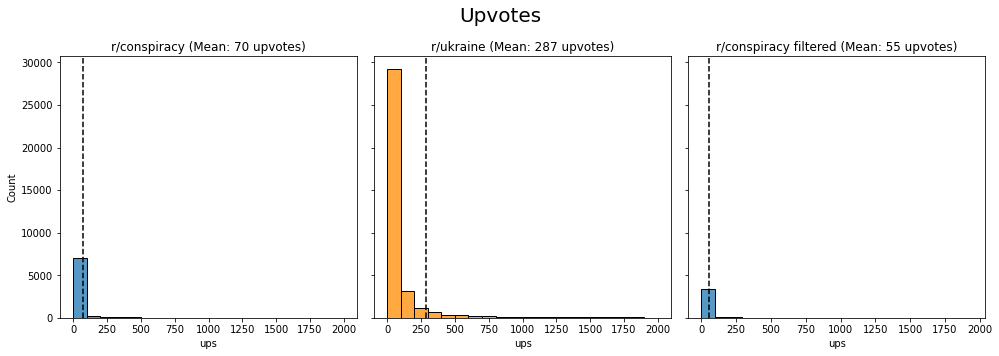

In [39]:
#https://github.com/benjamin-awd/Subreddit-Classification-with-NLP/blob/main/2_Data_Cleaning_EDA.ipynb

consp_df_ups = consp_df.drop(consp_df[consp_df['ups'] > 2000].index)

ukraine_df_ups = ukraine_df.drop(ukraine_df[ukraine_df['ups'] > 2000].index)
print(ukraine_df_ups.shape)
consp_df_filt_ups = consp_df_filtered.drop(consp_df_filtered[consp_df['ups'] > 2000].index)


fig, ax = plt.subplots(1, 3, figsize=(14,5), sharey=True)
ax = ax.ravel()
g_consp = sns.histplot(data=consp_df_ups, x='ups', ax = ax[0], bins=20)
mean_consp = consp_df['ups'].mean()
g_consp.set_title(f'r/conspiracy (Mean: {round(mean_consp)} upvotes)')
ax[0].axvline(mean_consp, ls='--', color='black')
g_ukraine = sns.histplot(data=ukraine_df_ups, x='ups', ax = ax[1], bins=20, color='darkorange')
mean_ukraine = ukraine_df['ups'].mean()
g_ukraine.set_title(f'r/ukraine (Mean: {round(mean_ukraine)} upvotes)')
ax[1].axvline(mean_ukraine, ls='--', color='black')
g_consp_filt = sns.histplot(data=consp_df_filt_ups, x='ups', ax = ax[2], bins=20)
mean_consp_filt = consp_df_filtered['ups'].mean()
g_consp_filt.set_title(f'r/conspiracy filtered (Mean: {round(mean_consp_filt)} upvotes)')
ax[2].axvline(mean_consp_filt, ls='--', color='black')
plt.suptitle('Upvotes', fontsize=20)
plt.tight_layout()

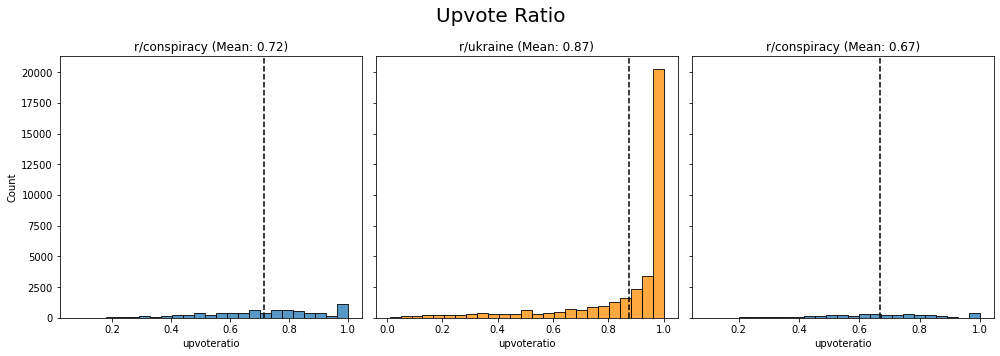

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(14,5), sharey=True)
ax = ax.ravel()

mean_consp = consp_df['upvoteratio'].mean()
g_consp = sns.histplot(data=consp_df, x='upvoteratio', ax = ax[0], bins=25)
g_consp.set_title(f'r/conspiracy (Mean: {(mean_consp):.2f})')
ax[0].axvline(mean_consp, ls='--', color='black')
mean_ukraine = ukraine_df['upvoteratio'].mean()
g_ukraine = sns.histplot(data=ukraine_df, x='upvoteratio', ax = ax[1], bins=25, color='darkorange')
g_ukraine.set_title(f'r/ukraine (Mean: {(mean_ukraine):.2f})')
ax[1].axvline(mean_ukraine, ls='--', color='black')

mean_consp_filt = consp_df_filtered['upvoteratio'].mean()
g_consp_filt = sns.histplot(data=consp_df_filtered, x='upvoteratio', ax = ax[2], bins=25)
g_consp_filt.set_title(f'r/conspiracy (Mean: {(mean_consp_filt):.2f})')
ax[2].axvline(mean_consp_filt, ls='--', color='black')

plt.suptitle('Upvote Ratio', fontsize=20)
plt.tight_layout()

Metadata about whole set

In [7]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of submissions'] = pd.Series({'value':len(dataframe)})
metadata.loc['deleted submissions'] = pd.Series({'value':len(dataframe.loc[pd.isna(dataframe['author'])])})
#metadata.loc['deleted submissions'] = pd.Series({'value':len(dataframe.loc[dataframe['self_text'].isin({ "[removed]", "[deleted]"})])})
print('{0:.2f}% of comments were deleted'.format(len(dataframe.loc[pd.isna(dataframe['author'])])/len(dataframe)))
metadata



0.31% of comments were deleted


,value
total num of submissions,36738
deleted submissions,11262


C:\Users\1408\AppData\Local\Temp\ipykernel_12588\3607886345.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time.index.strftime('%m-%d'), rotation=40, ha='right')


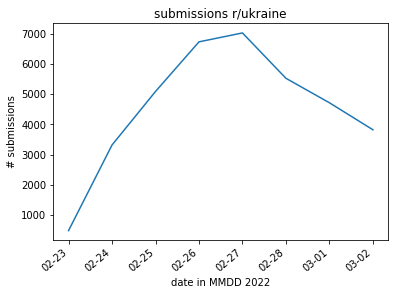

In [8]:
dataframe['date'] = dataframe['time'].apply(datetime.fromtimestamp)
time = dataframe.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()
#plot = plt.plot(time.index, time.values)
ax = sns.lineplot(x=time.index, y=time.values)
ax.set_xticklabels(time.index.strftime('%m-%d'), rotation=40, ha='right')
ax.set(xlabel='date in MMDD 2022', ylabel='# submissions', title=f'submissions r/{SUBREDDIT}')
ax.figure.savefig(f'./images/{SUBREDDIT}_date', bbox_inches='tight')

Metadata about authors

In [9]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of authors'] = pd.Series({'value':len(authors)})
metadata.loc['avg num of submissions'] = pd.Series({'value':'{:.2f}'.format(authors['size'].mean())})
metadata.loc['median num of submissions'] = pd.Series({'value':authors['size'].median()})
metadata


,value
total num of authors,15128
avg num of submissions,1.68
median num of submissions,1.0


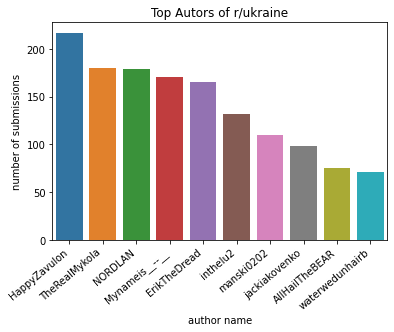

In [10]:
top_authors = authors.nlargest(10, 'size')
ax = sns.barplot(x='author', y='size', data=top_authors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set(xlabel='author name', ylabel='number of submissions', title=f'Top Autors of r/{SUBREDDIT}')
ax.figure.savefig(f'./images/{SUBREDDIT}_authors', bbox_inches='tight')


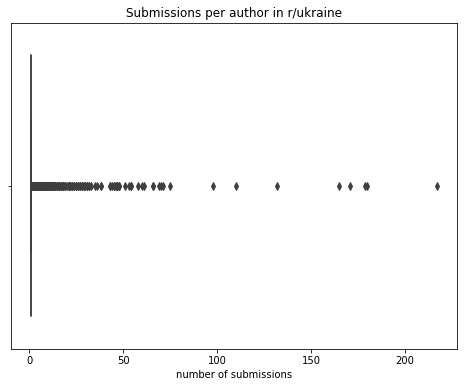

In [11]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=authors['size'])
ax.set(xlabel='number of submissions', title=f'Submissions per author in r/{SUBREDDIT}')
plt.savefig(f'./images/{SUBREDDIT}_submissions.png')
plt.show()

Metadata about single submissions

In [12]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['flesch reading ease score'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.flesch_reading_ease(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average word count'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.lexicon_count(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average num of comments per sub'] = pd.Series({'value':'{:.2f}'.format(dataframe['num_comments'].mean())})
metadata

,value
flesch reading ease score,70.63
average word count,11.62
average num of comments per sub,16.50


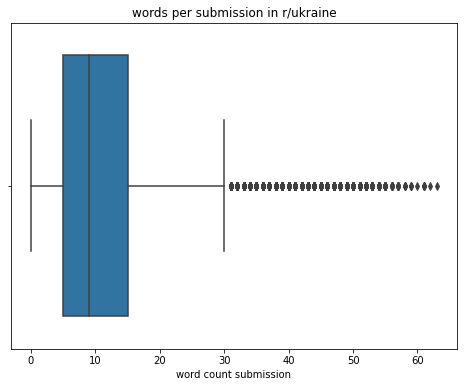

In [14]:
plt.figure(figsize=(8,6))
comment_lengths = [textstat.lexicon_count(str(comment)) for comment in dataframe['title']]
ax = sns.boxplot(x=comment_lengths)
ax.set(xlabel='word count submission', title=f'words per submission in r/{SUBREDDIT}')
plt.savefig(f'./images/{SUBREDDIT}_words_per_submissions.png')
plt.show()

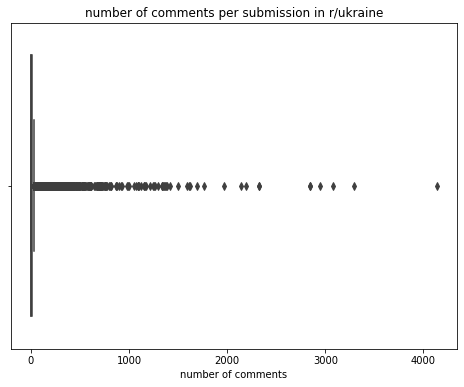

In [15]:
plt.figure(figsize=(8,6))
comment_num = dataframe['num_comments']
ax = sns.boxplot(x=comment_num)
ax.set(xlabel='number of comments', title=f'number of comments per submission in r/{SUBREDDIT}')
plt.savefig(f'./images/{SUBREDDIT}_num_comments.png')
plt.show()